In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#Loading the dataset

df = pd.read_csv('laptop_price.csv')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.shape

(1303, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
df.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [9]:
df['Ram']=df['Ram'].str.replace("GB",'') 

In [10]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [11]:
df['Weight']=df['Weight'].str.replace("kg",'') 

In [12]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [13]:
df['Ram']= df['Ram'].astype('int32')
df['Weight']= df['Ram'].astype('float64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int32  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 127.4+ KB


### DATA VISUALIZATION

C:\Users\91899\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


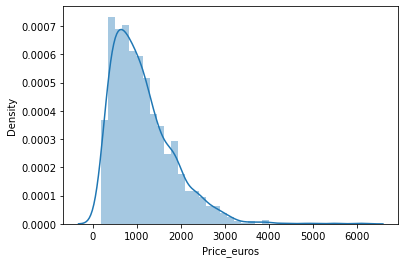

In [15]:
sns.distplot(df['Price_euros'])

plt.show()

<AxesSubplot:>

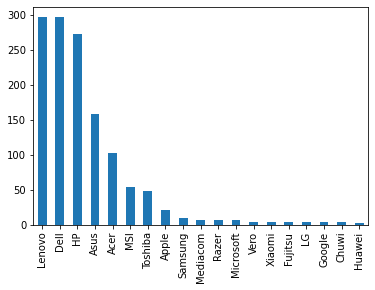

In [16]:
df['Company'].value_counts().plot(kind='bar')

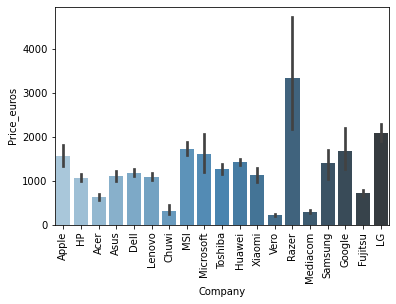

In [17]:
sns.barplot(x=df['Company'],y=df['Price_euros'],palette="Blues_d")

plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

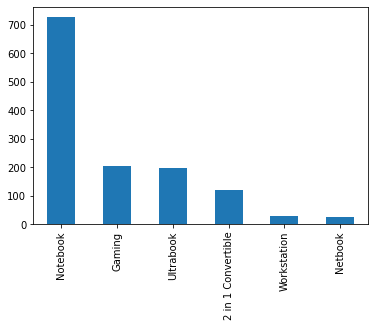

In [18]:
df['TypeName'].value_counts().plot(kind='bar')

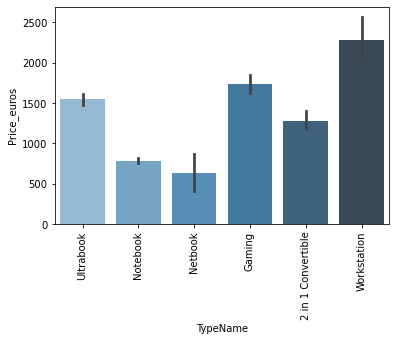

In [19]:
sns.barplot(x=df['TypeName'], y= df['Price_euros'],palette="Blues_d")
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

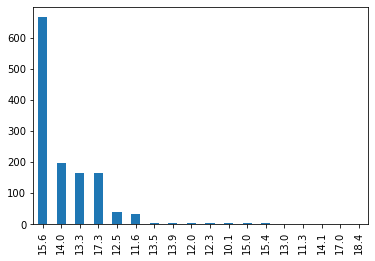

In [20]:
df['Inches'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

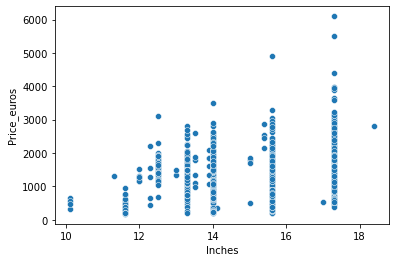

In [21]:
sns.scatterplot(x= df['Inches'], y= df['Price_euros'])

In [22]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x1440               

In [23]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [24]:
df.sample(5)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
648,656,Toshiba,Portege Z30-C-16J,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,8.0,1213.00,0
523,530,HP,ProBook 440,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,4.0,689.00,0
516,523,HP,15-bs190od (i5-8250U/4GB/1TB/W10),Notebook,15.6,Touchscreen 1366x768,Intel Core i5 8250U 1.6GHz,4,1TB HDD,Intel UHD Graphics 620,Windows 10,4.0,521.47,1
1143,1161,HP,ZBook 15,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia Quadro M1000M,Windows 7,8.0,2229.00,0
1104,1119,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,16.0,1199.00,0


<AxesSubplot:>

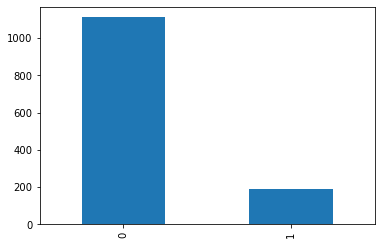

In [25]:
df['Touchscreen'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price_euros'>

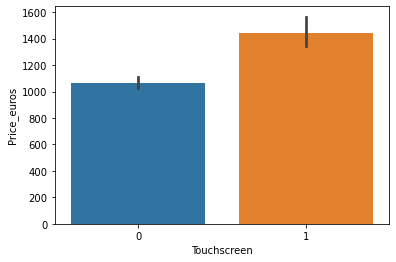

In [26]:
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'])

In [27]:
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [28]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,8.0,1339.69,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,8.0,898.94,0,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,8.0,575.00,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,16.0,2537.45,0,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,8.0,1803.60,0,1


<AxesSubplot:xlabel='IPS', ylabel='Price_euros'>

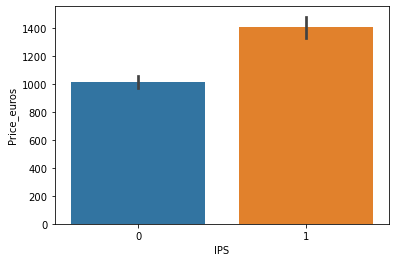

In [29]:
sns.barplot(x=df['IPS'],y=df['Price_euros'])

In [30]:
df2 = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [31]:
df['x_res'] = df2[0]
df['y_res'] = df2[1]

In [32]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,x_res,y_res
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,8.0,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,8.0,898.94,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,8.0,575.00,0,0,Full HD 1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,16.0,2537.45,0,1,IPS Panel Retina Display 2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,8.0,1803.60,0,1,IPS Panel Retina Display 2560,1600


In [33]:
df['x_res']=df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [34]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,x_res,y_res
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,8.0,1339.69,0,1,2560,1600
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,8.0,898.94,0,0,1440,900
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,8.0,575.00,0,0,1920,1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,16.0,2537.45,0,1,2880,1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,8.0,1803.60,0,1,2560,1600


In [35]:
df['x_res'] = df['x_res'].astype('int')
df['y_res'] = df['y_res'].astype('int')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int32  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
 13  Touchscreen       1303 non-null   int64  
 14  IPS               1303 non-null   int64  
 15  x_res             1303 non-null   int32  
 16  y_res             1303 non-null   int32  


In [37]:
df.corr()['Price_euros']

laptop_ID      0.067830
Inches         0.068197
Ram            0.743007
Weight         0.743007
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
Name: Price_euros, dtype: float64

In [38]:
df['ppi'] = (((df['x_res']**2) + (df['y_res']**2))**0.5/df['Inches']).astype('float')

In [39]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,x_res,y_res,ppi
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,8.0,1339.69,0,1,2560,1600,226.983005
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,8.0,898.94,0,0,1440,900,127.677940
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,8.0,575.00,0,0,1920,1080,141.211998
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,16.0,2537.45,0,1,2880,1800,220.534624
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,8.0,1803.60,0,1,2560,1600,226.983005


In [40]:
df.corr()['Price_euros']

laptop_ID      0.067830
Inches         0.068197
Ram            0.743007
Weight         0.743007
Price_euros    1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
ppi            0.473487
Name: Price_euros, dtype: float64

In [41]:
df.drop(columns=['ScreenResolution','laptop_ID','x_res','y_res','Inches'], inplace = True)

In [42]:
df.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,ppi
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,8.0,1339.69,0,1,226.983005
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,8.0,898.94,0,0,127.677940
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,8.0,575.00,0,0,141.211998
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,16.0,2537.45,0,1,220.534624
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,8.0,1803.60,0,1,226.983005


In [43]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     134
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core i3 6100U 2.1GHz       1
AMD A6-Series 7310 2GHz          1
Intel Core M M3-6Y30 0.9GHz      1
Intel Core i5 6440HQ 2.6GHz      1
AMD E-Series E2-6110 1.5GHz      1
Name: Cpu, Length: 118, dtype: int64

In [44]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [45]:
df.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,ppi,Cpu Name
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,8.0,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,8.0,898.94,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,8.0,575.00,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,16.0,2537.45,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,8.0,1803.60,0,1,226.983005,Intel Core i5


In [46]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [47]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

<AxesSubplot:>

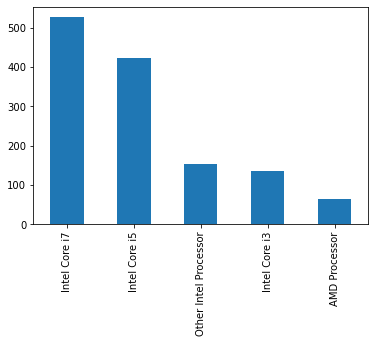

In [48]:
df['Cpu brand'].value_counts().plot(kind='bar')

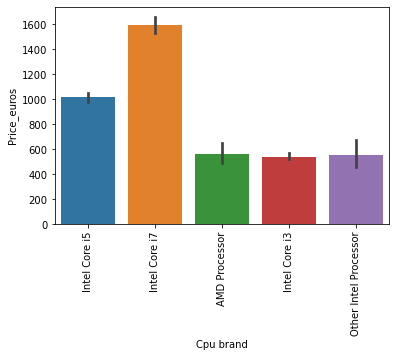

In [49]:
sns.barplot(x=df['Cpu brand'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [51]:
df.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,ppi,Cpu brand
0,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,8.0,1339.69,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,8.0,898.94,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,8.0,575.00,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,16.0,2537.45,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,8.0,1803.60,0,1,226.983005,Intel Core i5


<AxesSubplot:>

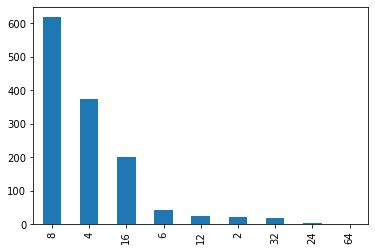

In [52]:
df['Ram'].value_counts().plot(kind='bar')

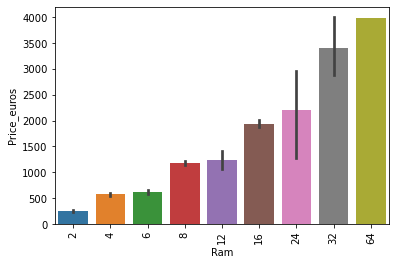

In [53]:
sns.barplot(x=df['Ram'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
512GB Flash Storage                2
256GB SSD +  256GB SSD             2
128GB SSD +  2TB HDD               2
32GB HDD                           1
5

### now splitting memory column into 4 column thats SSD, HDD, Hybrid, Flash Storage for more information

In [55]:
df["Memory"] = df["Memory"].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

<ipython-input-55-39ae259d83fd>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')
<ipython-input-55-39ae259d83fd>:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [56]:
df.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,8.0,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,8.0,898.94,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,8.0,575.00,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,16.0,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,8.0,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0


In [57]:
df.drop(columns=['Memory'],inplace=True)

In [58]:
df.head()

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,8.0,1339.69,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,8.0,898.94,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,8.0,575.00,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,16.0,2537.45,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,8.0,1803.60,0,1,226.983005,Intel Core i5,0,256,0,0


In [59]:
df.corr()['Price_euros']

Ram              0.743007
Weight           0.743007
Price_euros      1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price_euros, dtype: float64

In [60]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [61]:
df.head()

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,8.0,1339.69,0,1,226.983005,Intel Core i5,0,128
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,8.0,898.94,0,0,127.677940,Intel Core i5,0,0
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,8.0,575.00,0,0,141.211998,Intel Core i5,0,256
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,16.0,2537.45,0,1,220.534624,Intel Core i7,0,512
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,8.0,1803.60,0,1,226.983005,Intel Core i5,0,256


In [62]:
df['Gpu'].value_counts()

Intel HD Graphics 620       281
Intel HD Graphics 520       185
Intel UHD Graphics 620       68
Nvidia GeForce GTX 1050      66
Nvidia GeForce GTX 1060      48
                           ... 
Nvidia GeForce GTX 940M       1
AMD Radeon 540                1
Nvidia GeForce 940M           1
Nvidia GeForce GTX 930MX      1
AMD Radeon R7                 1
Name: Gpu, Length: 110, dtype: int64

In [63]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [64]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [65]:
df = df[df['Gpu brand'] != 'ARM']

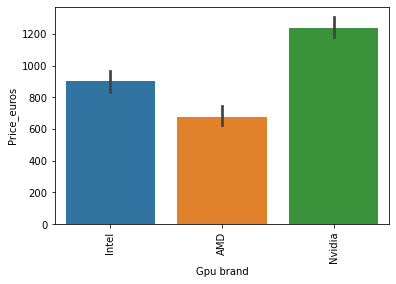

In [66]:
sns.barplot(x=df['Gpu brand'],y=df['Price_euros'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [67]:
df.drop(columns=['Gpu'],inplace=True)

In [68]:
df.head()

,Company,Product,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,MacBook Pro,Ultrabook,8,macOS,8.0,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Macbook Air,Ultrabook,8,macOS,8.0,898.94,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,250 G6,Notebook,8,No OS,8.0,575.00,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,MacBook Pro,Ultrabook,16,macOS,16.0,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,MacBook Pro,Ultrabook,8,macOS,8.0,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel


In [69]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

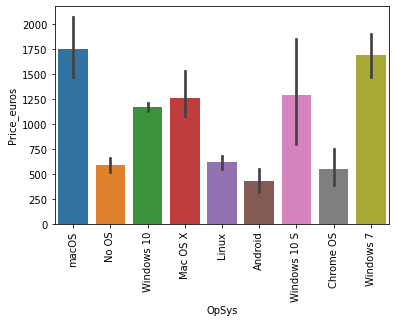

In [70]:
sns.barplot(x=df['OpSys'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [71]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [72]:
df['os'] = df['OpSys'].apply(cat_os)

In [73]:
df.head()

,Company,Product,TypeName,Ram,OpSys,Weight,Price_euros,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,MacBook Pro,Ultrabook,8,macOS,8.0,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Macbook Air,Ultrabook,8,macOS,8.0,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,250 G6,Notebook,8,No OS,8.0,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,MacBook Pro,Ultrabook,16,macOS,16.0,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,8,macOS,8.0,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [74]:
df.drop(columns=['OpSys'],inplace=True)

In [75]:
df.head()

,Company,Product,TypeName,Ram,Weight,Price_euros,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,MacBook Pro,Ultrabook,8,8.0,1339.69,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Macbook Air,Ultrabook,8,8.0,898.94,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,250 G6,Notebook,8,8.0,575.00,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,MacBook Pro,Ultrabook,16,16.0,2537.45,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,8,8.0,1803.60,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


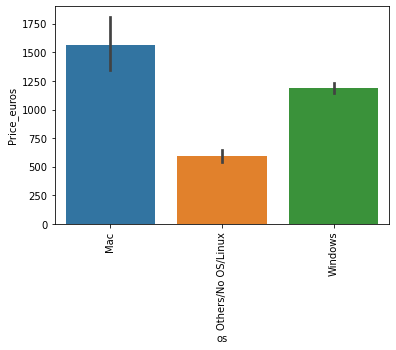

In [76]:
sns.barplot(x=df['os'],y=df['Price_euros'])
plt.xticks(rotation='vertical')
plt.show()

In [77]:
df['Price'] = df['Price_euros']*87.53
df.drop(['Price_euros'],axis=1,inplace=True)

In [78]:
df.head()

,Company,Product,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os,Price
0,Apple,MacBook Pro,Ultrabook,8,8.0,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,117263.0657
1,Apple,Macbook Air,Ultrabook,8,8.0,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,78684.2182
2,HP,250 G6,Notebook,8,8.0,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux,50329.7500
3,Apple,MacBook Pro,Ultrabook,16,16.0,0,1,220.534624,Intel Core i7,0,512,AMD,Mac,222102.9985
4,Apple,MacBook Pro,Ultrabook,8,8.0,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,157869.1080


<AxesSubplot:xlabel='Weight', ylabel='Price'>

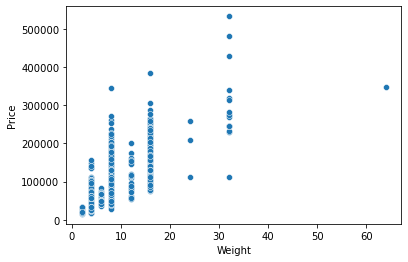

In [79]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [80]:
df.corr()['Price']

Ram            0.742905
Weight         0.742905
Touchscreen    0.192917
IPS            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Price          1.000000
Name: Price, dtype: float64

<AxesSubplot:>

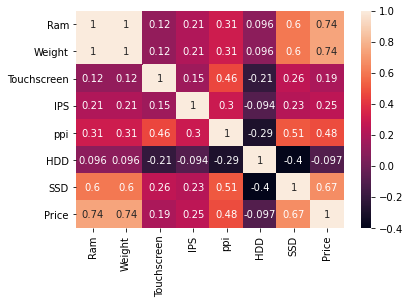

In [81]:
sns.heatmap(df.corr(),annot=True)

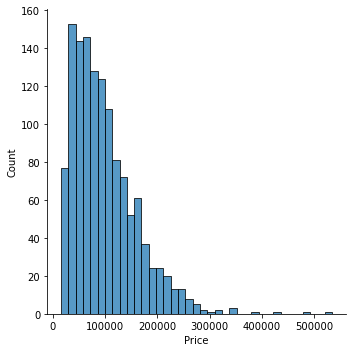

In [82]:
sns.displot(df['Price'])

C:\Users\91899\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

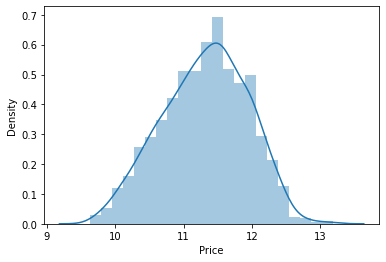

In [83]:
sns.distplot(np.log(df['Price']))

In [84]:
df

,Company,Product,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os,Price
0,Apple,MacBook Pro,Ultrabook,8,8.0,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,117263.0657
1,Apple,Macbook Air,Ultrabook,8,8.0,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,78684.2182
2,HP,250 G6,Notebook,8,8.0,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux,50329.7500
3,Apple,MacBook Pro,Ultrabook,16,16.0,0,1,220.534624,Intel Core i7,0,512,AMD,Mac,222102.9985
4,Apple,MacBook Pro,Ultrabook,8,8.0,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,157869.1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,4,4.0,1,1,157.350512,Intel Core i7,0,128,Intel,Windows,55844.1400
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,16,16.0,1,1,276.053530,Intel Core i7,0,512,Intel,Windows,131207.4700
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,2,2.0,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows,20044.3700
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,6,6.0,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows,66872.9200


In [85]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [86]:
df.replace({"Notebook": 0, "Gaming": 1, "Ultrabook": 2, "2 in 1 Convertible": 3, "Netbook": 4, "Workstation": 5}, inplace = True)

In [87]:
df['Cpu brand'].value_counts()

Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             62
Name: Cpu brand, dtype: int64

In [88]:
df.replace({"Intel Core i7": 0, "Intel Core i5": 1, "Other Intel Processor": 2, "Intel Core i3": 3, "AMD Processor": 4}, inplace = True)

In [89]:
df.head()

,Company,Product,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os,Price
0,Apple,MacBook Pro,2,8,8.0,0,1,226.983005,1,0,128,Intel,Mac,117263.0657
1,Apple,Macbook Air,2,8,8.0,0,0,127.677940,1,0,0,Intel,Mac,78684.2182
2,HP,250 G6,0,8,8.0,0,0,141.211998,1,0,256,Intel,Others/No OS/Linux,50329.7500
3,Apple,MacBook Pro,2,16,16.0,0,1,220.534624,0,0,512,AMD,Mac,222102.9985
4,Apple,MacBook Pro,2,8,8.0,0,1,226.983005,1,0,256,Intel,Mac,157869.1080


In [90]:
df['os'].value_counts()

Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: os, dtype: int64

In [91]:
df.replace({"Windows": 0, "Others/No OS/Linux": 1, "Mac": 2}, inplace = True)

In [92]:
df.head()

,Company,Product,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os,Price
0,Apple,MacBook Pro,2,8,8.0,0,1,226.983005,1,0,128,Intel,2,117263.0657
1,Apple,Macbook Air,2,8,8.0,0,0,127.677940,1,0,0,Intel,2,78684.2182
2,HP,250 G6,0,8,8.0,0,0,141.211998,1,0,256,Intel,1,50329.7500
3,Apple,MacBook Pro,2,16,16.0,0,1,220.534624,0,0,512,AMD,2,222102.9985
4,Apple,MacBook Pro,2,8,8.0,0,1,226.983005,1,0,256,Intel,2,157869.1080


In [93]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

In [94]:
df.replace({"Intel": 0, "Nvidia": 1, "AMD": 2}, inplace = True)

In [95]:
df.head()

,Company,Product,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os,Price
0,Apple,MacBook Pro,2,8,8.0,0,1,226.983005,1,0,128,0,2,117263.0657
1,Apple,Macbook Air,2,8,8.0,0,0,127.677940,1,0,0,0,2,78684.2182
2,HP,250 G6,0,8,8.0,0,0,141.211998,1,0,256,0,1,50329.7500
3,Apple,MacBook Pro,2,16,16.0,0,1,220.534624,0,0,512,2,2,222102.9985
4,Apple,MacBook Pro,2,8,8.0,0,1,226.983005,1,0,256,0,2,157869.1080


In [96]:
from sklearn.preprocessing import LabelEncoder

In [97]:
enc = LabelEncoder()

In [98]:
df['Product'] = LabelEncoder().fit_transform(df['Product'])

In [99]:
df.head()

,Company,Product,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu brand,os,Price
0,Apple,299,2,8,8.0,0,1,226.983005,1,0,128,0,2,117263.0657
1,Apple,300,2,8,8.0,0,0,127.677940,1,0,0,0,2,78684.2182
2,HP,50,0,8,8.0,0,0,141.211998,1,0,256,0,1,50329.7500
3,Apple,299,2,16,16.0,0,1,220.534624,0,0,512,2,2,222102.9985
4,Apple,299,2,8,8.0,0,1,226.983005,1,0,256,0,2,157869.1080


In [103]:
Company = df[["Company"]]

Company = pd.get_dummies(Company, drop_first = True)

Company.head()

,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
df1 = pd.concat([df,Company], axis = 1)

In [105]:
df1.head()

,Company,Product,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,Apple,299,2,8,8.0,0,1,226.983005,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Apple,300,2,8,8.0,0,0,127.677940,1,0,...,0,0,0,0,0,0,0,0,0,0
2,HP,50,0,8,8.0,0,0,141.211998,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Apple,299,2,16,16.0,0,1,220.534624,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Apple,299,2,8,8.0,0,1,226.983005,1,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1302 non-null   object 
 1   Product            1302 non-null   int32  
 2   TypeName           1302 non-null   int64  
 3   Ram                1302 non-null   int32  
 4   Weight             1302 non-null   float64
 5   Touchscreen        1302 non-null   int64  
 6   IPS                1302 non-null   int64  
 7   ppi                1302 non-null   float64
 8   Cpu brand          1302 non-null   int64  
 9   HDD                1302 non-null   int64  
 10  SSD                1302 non-null   int64  
 11  Gpu brand          1302 non-null   int64  
 12  os                 1302 non-null   int64  
 13  Price              1302 non-null   float64
 14  Company_Apple      1302 non-null   uint8  
 15  Company_Asus       1302 non-null   uint8  
 16  Company_Chuwi      1302 

In [107]:
df1.drop(["Company"], axis = 1, inplace = True)

In [108]:
df1.head()

,Product,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,299,2,8,8.0,0,1,226.983005,1,0,128,...,0,0,0,0,0,0,0,0,0,0
1,300,2,8,8.0,0,0,127.677940,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,50,0,8,8.0,0,0,141.211998,1,0,256,...,0,0,0,0,0,0,0,0,0,0
3,299,2,16,16.0,0,1,220.534624,0,0,512,...,0,0,0,0,0,0,0,0,0,0
4,299,2,8,8.0,0,1,226.983005,1,0,256,...,0,0,0,0,0,0,0,0,0,0


In [109]:
X = df1.drop(columns=['Price'])
y = np.log(df1['Price'])

In [114]:
X

,Product,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,299,2,8,8.0,0,1,226.983005,1,0,128,...,0,0,0,0,0,0,0,0,0,0
1,300,2,8,8.0,0,0,127.677940,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,50,0,8,8.0,0,0,141.211998,1,0,256,...,0,0,0,0,0,0,0,0,0,0
3,299,2,16,16.0,0,1,220.534624,0,0,512,...,0,0,0,0,0,0,0,0,0,0
4,299,2,8,8.0,0,1,226.983005,1,0,256,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,579,3,4,4.0,1,1,157.350512,0,0,128,...,0,1,0,0,0,0,0,0,0,0
1299,587,3,16,16.0,1,1,276.053530,0,0,512,...,0,1,0,0,0,0,0,0,0,0
1300,195,0,2,2.0,0,0,111.935204,2,0,0,...,0,1,0,0,0,0,0,0,0,0
1301,2,0,6,6.0,0,0,100.454670,0,1000,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
y

0       11.672175
1       11.273198
2       10.826352
3       12.310897
4       11.969522
          ...    
1298    10.930320
1299    11.784535
1300     9.905704
1301    11.110549
1302    10.382778
Name: Price, Length: 1302, dtype: float64

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [117]:
X_train

,Product,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
183,410,0,8,8.0,0,0,100.454670,1,0,128,...,0,0,0,0,0,0,0,1,0,0
1141,165,1,8,8.0,0,0,141.211998,0,1000,128,...,0,0,1,0,0,0,0,0,0,0
1049,94,4,4,4.0,0,0,135.094211,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1020,245,3,4,4.0,1,1,141.211998,3,1000,0,...,0,0,0,0,0,0,0,0,0,0
878,550,0,4,4.0,0,0,141.211998,1,1000,128,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,59,0,4,4.0,0,0,100.454670,3,500,0,...,0,0,0,0,0,0,0,0,0,0
299,609,2,16,16.0,0,0,141.211998,0,0,512,...,0,0,0,0,0,0,0,0,0,0
493,59,0,8,8.0,0,0,100.454670,4,1000,0,...,0,0,0,0,0,0,0,0,0,0
527,210,0,8,8.0,0,0,100.454670,3,2000,0,...,0,1,0,0,0,0,0,0,0,0


In [118]:
X_test

,Product,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
248,360,0,4,4.0,0,1,165.632118,1,500,0,...,0,0,0,0,0,0,0,0,0,0
555,53,0,4,4.0,0,0,100.454670,2,500,0,...,0,0,0,0,0,0,0,0,0,0
1251,51,0,4,4.0,0,0,100.454670,4,500,0,...,0,0,0,0,0,0,0,0,0,0
547,522,0,4,4.0,0,0,141.211998,1,1000,0,...,0,1,0,0,0,0,0,0,0,0
885,113,3,4,4.0,1,0,165.632118,1,0,256,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,310,1,8,8.0,0,1,127.335675,1,1000,128,...,0,0,0,0,0,0,0,0,0,0
172,206,0,4,4.0,0,0,100.454670,4,500,0,...,0,1,0,0,0,0,0,0,0,0
322,605,0,8,8.0,0,0,157.350512,0,0,256,...,0,0,0,0,0,0,0,0,0,0
996,417,2,8,8.0,1,1,165.632118,0,0,256,...,0,0,0,0,0,0,0,0,0,0


In [124]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error

### Linear Regression

In [125]:
model = LinearRegression()

In [126]:
model.fit(X_train,y_train)

LinearRegression()

In [127]:
y_pred = model.predict(X_test)

In [128]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.779434118958733
MAE 0.21257893364642416


### Lasso Regression

In [129]:
model = Lasso(alpha=0.001)

In [130]:
model.fit(X_train,y_train)

Lasso(alpha=0.001)

In [131]:
y_pred = model.predict(X_test)

In [132]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7781082434474026
MAE 0.2147517732395386


### Rigid Regression

In [133]:
model = Ridge(alpha=10)

In [134]:
model.fit(X_train,y_train)

Ridge(alpha=10)

In [135]:
y_pred = model.predict(X_test)

In [136]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7707455252848434
MAE 0.22007087721630733


### Random Forest Regression

In [150]:
model = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

In [151]:
model.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features=0.75, max_samples=0.5,
                      random_state=3)

In [152]:
y_pred = model.predict(X_test)

In [153]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8922526857718897
MAE 0.15897483776900134


### Decision Tree

In [142]:
model = DecisionTreeRegressor(max_depth=8)

In [143]:
model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8)

In [144]:
y_pred = model.predict(X_test)

In [145]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8191017453473318
MAE 0.2074132493833459


### SVM

In [146]:
model = SVR(kernel='rbf',C=10000,epsilon=0.1)

In [147]:
model.fit(X_train,y_train)

SVR(C=10000)

In [148]:
y_pred = model.predict(X_test)

In [149]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7474785097091445
MAE 0.2187769972262185


In [154]:
import pickle
pickle.dump(model,open('laptop.pkl','wb'))
pickle.dump(df,open('data.pkl','wb'))